In [1]:
import distl
import numpy as np

First we'll create a [gaussian](../api/gaussian.md), [uniform](../api/uniform.md), and [multivariate gaussian](../api/mvaussian.md) distributions.

In [2]:
g = distl.gaussian(10, 2, label='gaussian')

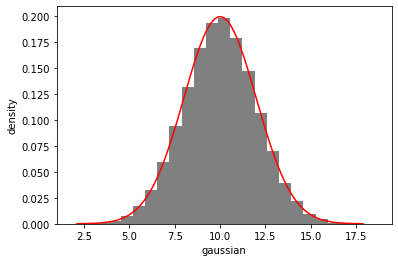

In [3]:
out = g.plot(show=True)

In [4]:
u = distl.uniform(0, 5, label='uniform')

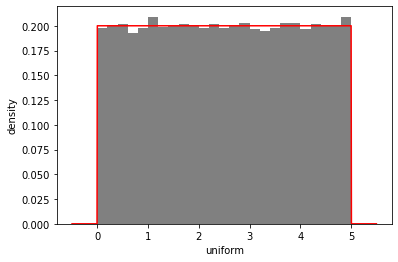

In [5]:
out = u.plot(show=True)

In [6]:
mvg = distl.mvgaussian([5,10, 12], 
                       np.array([[ 2,  1, -1], 
                                 [ 1,  2,  1], 
                                 [-1,  1,  2]]),
                       allow_singular=True,
                       labels=['mvg_a', 'mvg_b', 'mvg_c'])

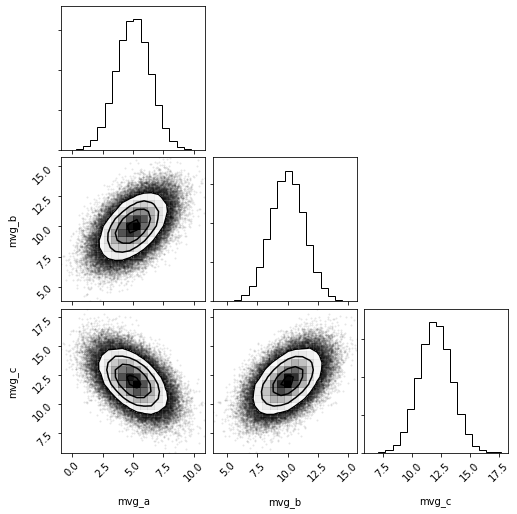

In [7]:
out = mvg.plot(show=True)

Now let's imagine a scenario where we want to draw from the following "parameters": 'gaussian', 'uniform', 'mvg_a', and 'mvg_c' (but let's say we don't want 'mvg_b').  Here we want to *maintain* the covariances between 'mvg_a' and 'mvg_c' while *independently* sampling from 'gaussian' and 'uniform'.

To learn about slicing multivariate distributions, see [multivariate slicing](./multivariate_slice.ipynb).

To do this, we'll create a [DistributionCollection](../api/DistributionCollection.md)

In [8]:
dc = distl.DistributionCollection(g, u, mvg.slice('mvg_a'), mvg.slice('mvg_c'))

In [9]:
dc.to_dict()

{'distl': 'DistributionCollection',
 'distributions': [{'loc': 10.0,
   'scale': 2.0,
   'distl': 'Gaussian',
   'label': 'gaussian'},
  {'low': 0.0, 'high': 5.0, 'distl': 'Uniform', 'label': 'uniform'},
  {'distl': 'MVGaussianSlice',
   'multivariate': {'mean': [5, 10, 12],
    'cov': [[2, 1, -1], [1, 2, 1], [-1, 1, 2]],
    'allow_singular': True,
    'distl': 'MVGaussian',
    'labels': ['mvg_a', 'mvg_b', 'mvg_c']},
   'dimension': 0},
  {'distl': 'MVGaussianSlice',
   'multivariate': {'mean': [5, 10, 12],
    'cov': [[2, 1, -1], [1, 2, 1], [-1, 1, 2]],
    'allow_singular': True,
    'distl': 'MVGaussian',
    'labels': ['mvg_a', 'mvg_b', 'mvg_c']},
   'dimension': 2}]}

In [10]:
#distl.from_dict(dc.to_dict())

In [12]:
#dc.sample()